# Final Project (Capstone Project)

## The Financial Analyst Challenge: Analyze and advice on a Client´s portfolio

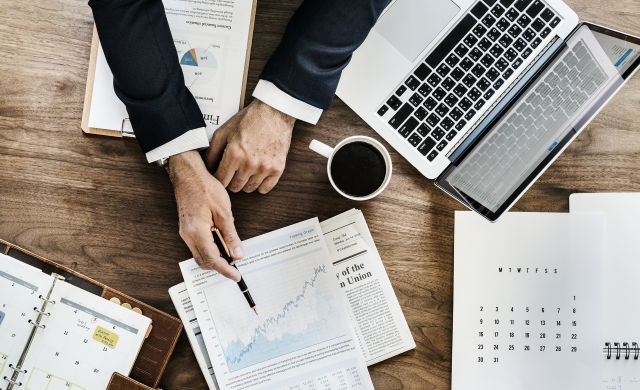

### The Case

It´s your first day as Financial Analyst in an Asset Management Firm that manages the Portfolios of High Net Worth Individuals (HNWI). <br><br>
Your Boss recently solicited a new Client, Mary Johnson, 65 years old. Mary recently retired after 30 Years as an independent physician. Her husband died soon and bequeathed a considerable Investment Portfolio to her. <br><br>
From 1997 until today she has been solely invested into __5 Health Care Stocks__, that are today the __most valuable__ Health Care Stocks in the US Market in terms of __Market Capitalization__. She strongly believes that it´s best to only invest into sectors where she has specific industry expertise (Health Care). She only trusts the largest and best-known companies in the market. Her Strategy has been pretty simple: Buying an __equal number of shares__ of each Stock and __reinvesting all dividends__ (assume no costs and taxes). <br> <br> 
Now that she has retired with no active work income (she needs to live from her Investment Portfolio), Mary decided to make her portfolio more suitable to the new situation. In a very first step, she agreed with your boss to sell parts of her five-Stocks Portfolio and invest into lower risk Government Bonds and high-quality Corporate Bonds.   <br> <br>
Now, as a next second step, it´s your task to guide her into a __more diversified Stock Portfolio that better reflects Modern Portfolio Theory__.   

---------------------------------------------------------------------

# Step 1: Identify the five stocks and get the respective Stock Tickers!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import cufflinks as cf

plt.style.use("seaborn-v0_8")
pd.options.display.float_format = '{:.3f}'.format

In [2]:
listings = pd.read_csv("../Data/listings_clean.csv", index_col = "Symbol")

In [3]:
listings.head()

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
A,NYSE,"Agilent Technologies, Inc.",81.680,25934696179.920,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
AA,NYSE,Alcoa Corporation,29.150,5407809589.600,2016,Basic Industries,Aluminum
AABA,NASDAQ,Altaba Inc.,75.390,42781131315.300,1969,Technology,EDP Services
AAC,NYSE,"AAC Holdings, Inc.",2.160,53141086.800,2014,Health Care,Medical Specialities
AAL,NASDAQ,"American Airlines Group, Inc.",34.020,15276869742.960,1969,Transportation,Air Freight/Delivery Services


In [4]:
listings.tail()

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
ZUMZ,NASDAQ,Zumiez Inc.,26.720,681919062.560,2005,Consumer Services,Clothing/Shoe/Accessory Stores
ZUO,NYSE,"Zuora, Inc.",19.790,2147266454.000,2018,Technology,Computer Software: Prepackaged Software
ZYME,NYSE,Zymeworks Inc.,15.740,504078206.260,2017,Health Care,Major Pharmaceuticals
ZYNE,NASDAQ,"Zynerba Pharmaceuticals, Inc.",7.850,165399468.600,2015,Health Care,Major Pharmaceuticals
ZYXI,NASDAQ,"Zynex, Inc.",5.020,161834880.480,1969,Health Care,Biotechnology: Electromedical & Electrotherape...


In [5]:
# take onlt the Health Care sector
health = listings.loc[listings.Sector == "Health Care"].copy()

In [6]:
# take the 5 largest 
large_cap_hea = health.nlargest(n = 5, columns = "Market_Cap")

In [7]:
large_cap_hea

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
JNJ,NYSE,Johnson & Johnson,135.580,361018644165.180,1969,Health Care,Major Pharmaceuticals
PFE,NYSE,"Pfizer, Inc.",42.730,237228618676.700,1969,Health Care,Major Pharmaceuticals
UNH,NYSE,UnitedHealth Group Incorporated,246.030,236075260845.450,1969,Health Care,Medical Specialities
MRK,NYSE,"Merck & Company, Inc.",80.820,208764129420.360,1969,Health Care,Major Pharmaceuticals
NVS,NYSE,Novartis AG,81.930,189354275177.970,1969,Health Care,Major Pharmaceuticals


In [8]:
ticker = large_cap_hea.index.to_list()

In [9]:
ticker

['JNJ', 'PFE', 'UNH', 'MRK', 'NVS']

# Step 2: Create an appropriate Index from 1997 - 2018 that best reflects her strategy and create a normalized Price Chart 

In [10]:
start = "1997-01-01"
end = "2018-12-31"

__Download the Adj close and Close of the symbols__
- Why the `Adj close` and `Close`? 
    - > __`Close`__: beacuse we need to calculate the weigths of our portfolio (Price Weigted index) by the close price.
    - > __`Adj close`__: for weigh the daily returns based on the adjusted closed prices

In [11]:
stocks = yf.download(ticker, start= start, end = end )[["Adj Close", "Close"]]

[*********************100%%**********************]  5 of 5 completed


In [12]:
stocks

Adj Close                                Close                \
                 JNJ    MRK    NVS    PFE     UNH     JNJ    MRK    NVS   
Date                                                                      
1997-01-02    12.921 15.214 12.442  5.517   4.574  24.875 38.108 25.594   
1997-01-03    13.051 15.737 12.360  5.635   4.701  25.125 39.420 25.426   
1997-01-06    13.149 15.785 12.333  5.610   4.713  25.312 39.540 25.370   
1997-01-07    13.181 15.809 12.360  5.694   4.726  25.375 39.599 25.426   
1997-01-08    13.278 15.618 12.333  5.694   4.625  25.562 39.122 25.370   
...              ...    ...    ...    ...     ...     ...    ...    ...   
2018-12-21   111.876 60.122 61.738 32.858 221.934 128.090 69.561 74.686   
2018-12-24   107.291 58.679 61.101 31.777 216.906 122.840 67.891 73.916   
2018-12-26   110.671 61.029 62.790 33.062 226.599 126.710 70.611 75.959   
2018-12-27   111.282 62.167 62.272 33.579 229.039 127.410 71.927 75.332   
2018-12-28   111.160 62.159 63.153 33.665 229.290 127.270 71.918 76.398   

                           
              PFE     UNH  
Date                       
1997-01-02 12.947   5.656  
1997-01-03 13.223   5.812  
1997-01-06 13.164   5.828  
1997-01-07 13.362   5.844  
1997-01-08 13.362   5.719  
...           ...     ...  
2018-12-21 39.782 238.340  
2018-12-24 38.472 232.940  
2018-12-26 40.028 243.350  
2018-12-27 40.655 245.970  
2018-12-28 40.759 246.240  

[5535 rows x 10 columns]

__Compute the weigths over the time (Price Weigted Index)__

In [13]:
weights = stocks.Close.div(stocks.Close.sum(axis = 1), axis = "index")

In [14]:
weights

,JNJ,MRK,NVS,PFE,UNH
Date,,,,,
1997-01-02,0.232,0.356,0.239,0.121,0.053
1997-01-03,0.230,0.362,0.233,0.121,0.053
1997-01-06,0.232,0.362,0.232,0.121,0.053
1997-01-07,0.232,0.361,0.232,0.122,0.053
1997-01-08,0.234,0.358,0.232,0.122,0.052
...,...,...,...,...,...
2018-12-21,0.233,0.126,0.136,0.072,0.433
2018-12-24,0.229,0.127,0.138,0.072,0.435
2018-12-26,0.228,0.127,0.136,0.072,0.437


__Compute the simple return (based on Adj close)__

In [15]:
ret = stocks["Adj Close"].pct_change().dropna()

In [16]:

# Compute the daily return of the index portfolio 
# hea_index -> (health index)
hea_index = ret.mul(weights.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)

In [17]:
hea_index

Date
1997-01-03   101.705
1997-01-06   101.898
1997-01-07   102.263
1997-01-08   101.824
1997-01-09   102.294
               ...  
2018-12-21   857.504
2018-12-24   835.072
2018-12-26   867.160
2018-12-27   874.382
2018-12-28   876.393
Length: 5534, dtype: float64

In [18]:
hea_index[pd.to_datetime("1996-12-31")] = 100

In [20]:
hea_index.sort_index(inplace = True)

In [21]:
hea_index.name = "Health Care"

In [22]:
hea_index

Date
1996-12-31   100.000
1997-01-03   101.705
1997-01-06   101.898
1997-01-07   102.263
1997-01-08   101.824
               ...  
2018-12-21   857.504
2018-12-24   835.072
2018-12-26   867.160
2018-12-27   874.382
2018-12-28   876.393
Name: Health Care, Length: 5535, dtype: float64

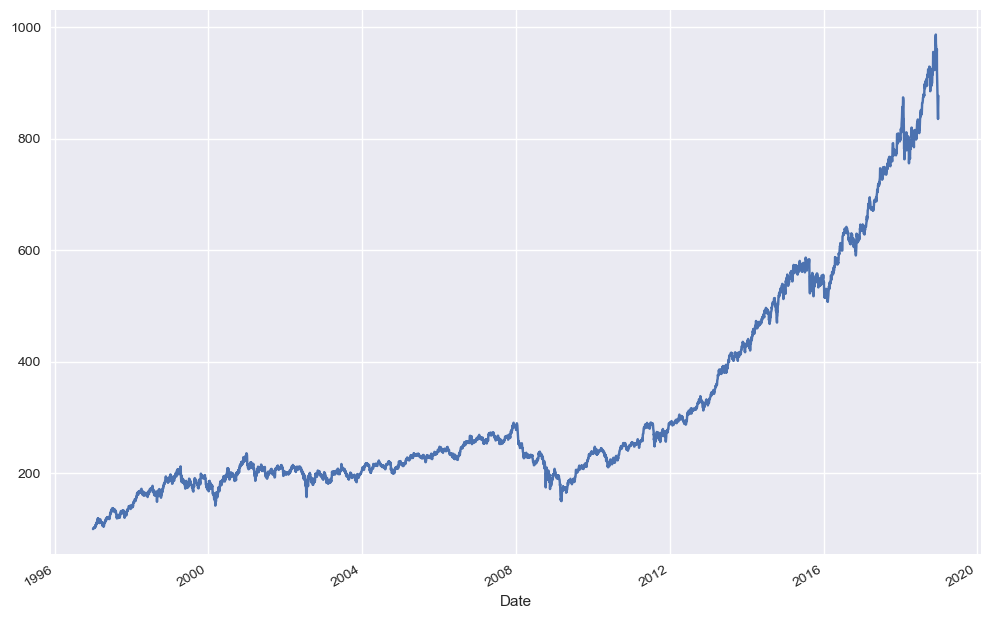

In [23]:
# Plot the health care index 
hea_index.plot(figsize = (12, 8))
plt.show()

That looks really terrific! Her initial Investment increased eightfold in 22 Years.  

---

# Step 3: 
### Verify the following statement that she made during the first meeting with your boss: "For investments periods of 6 years or longer, I never lost money with my portfolio!" Is she right? 

Hint: Create a Return Triangle with annual log Returns.

In [25]:
# Resample to annualze frequency
annual = hea_index.resample("A", kind = "period").last().to_frame()
annual

,Health Care
Date,
1996,100.000
1997,141.330
1998,191.626
1999,174.119
2000,235.431
2001,201.511
2002,191.683
2003,207.566
2004,221.589


In [26]:
annual.columns = ["Price"]

In [27]:
# Compute the annual log return 
annual["Return"] = np.log(annual.Price / annual.Price.shift())

In [28]:
annual.dropna(inplace = True)

In [29]:
annual

,Price,Return
Date,,
1997,141.330,0.346
1998,191.626,0.304
1999,174.119,-0.096
2000,235.431,0.302
2001,201.511,-0.156
2002,191.683,-0.050
2003,207.566,0.080
2004,221.589,0.065
2005,239.044,0.076


In [30]:
# How many years we have? 
years = annual.index.size
years

22

In [31]:
# Create windoes as the number of years 
windows = [year for year in range(years, 0, -1)]
windows

[22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [32]:
# Compute the rolling annual return for each period of years
for year in windows: 
    # the rolling mean return of 1 years,2 years, ... , 22 years
    annual["{}Y".format(year)] = annual.Return.rolling(year).mean()

In [33]:
annual

,Price,Return,22Y,21Y,20Y,19Y,18Y,17Y,16Y,15Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1997,141.330,0.346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.346
1998,191.626,0.304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325,0.304
1999,174.119,-0.096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.185,0.104,-0.096
2000,235.431,0.302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.214,0.170,0.103,0.302
2001,201.511,-0.156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.140,0.089,0.017,0.073,-0.156
2002,191.683,-0.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.108,0.061,0.000,0.032,-0.103,-0.050
2003,207.566,0.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.104,0.064,0.016,0.044,-0.042,0.015,0.080
2004,221.589,0.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.099,0.064,0.024,0.048,-0.015,0.032,0.072,0.065
2005,239.044,0.076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.097,0.066,0.032,0.053,0.003,0.043,0.074,0.071,0.076


In [34]:
triangle = annual.drop(columns = ["Price", "Return"])

In [35]:
triangle
# So far we have the rolling mean return of windows size 
# of the number of the years. 

,22Y,21Y,20Y,19Y,18Y,17Y,16Y,15Y,14Y,13Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.346
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325,0.304
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.185,0.104,-0.096
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.214,0.170,0.103,0.302
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.140,0.089,0.017,0.073,-0.156
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.108,0.061,0.000,0.032,-0.103,-0.050
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.104,0.064,0.016,0.044,-0.042,0.015,0.080
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.099,0.064,0.024,0.048,-0.015,0.032,0.072,0.065
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.097,0.066,0.032,0.053,0.003,0.043,0.074,0.071,0.076


__Plot the rolling return over the years__

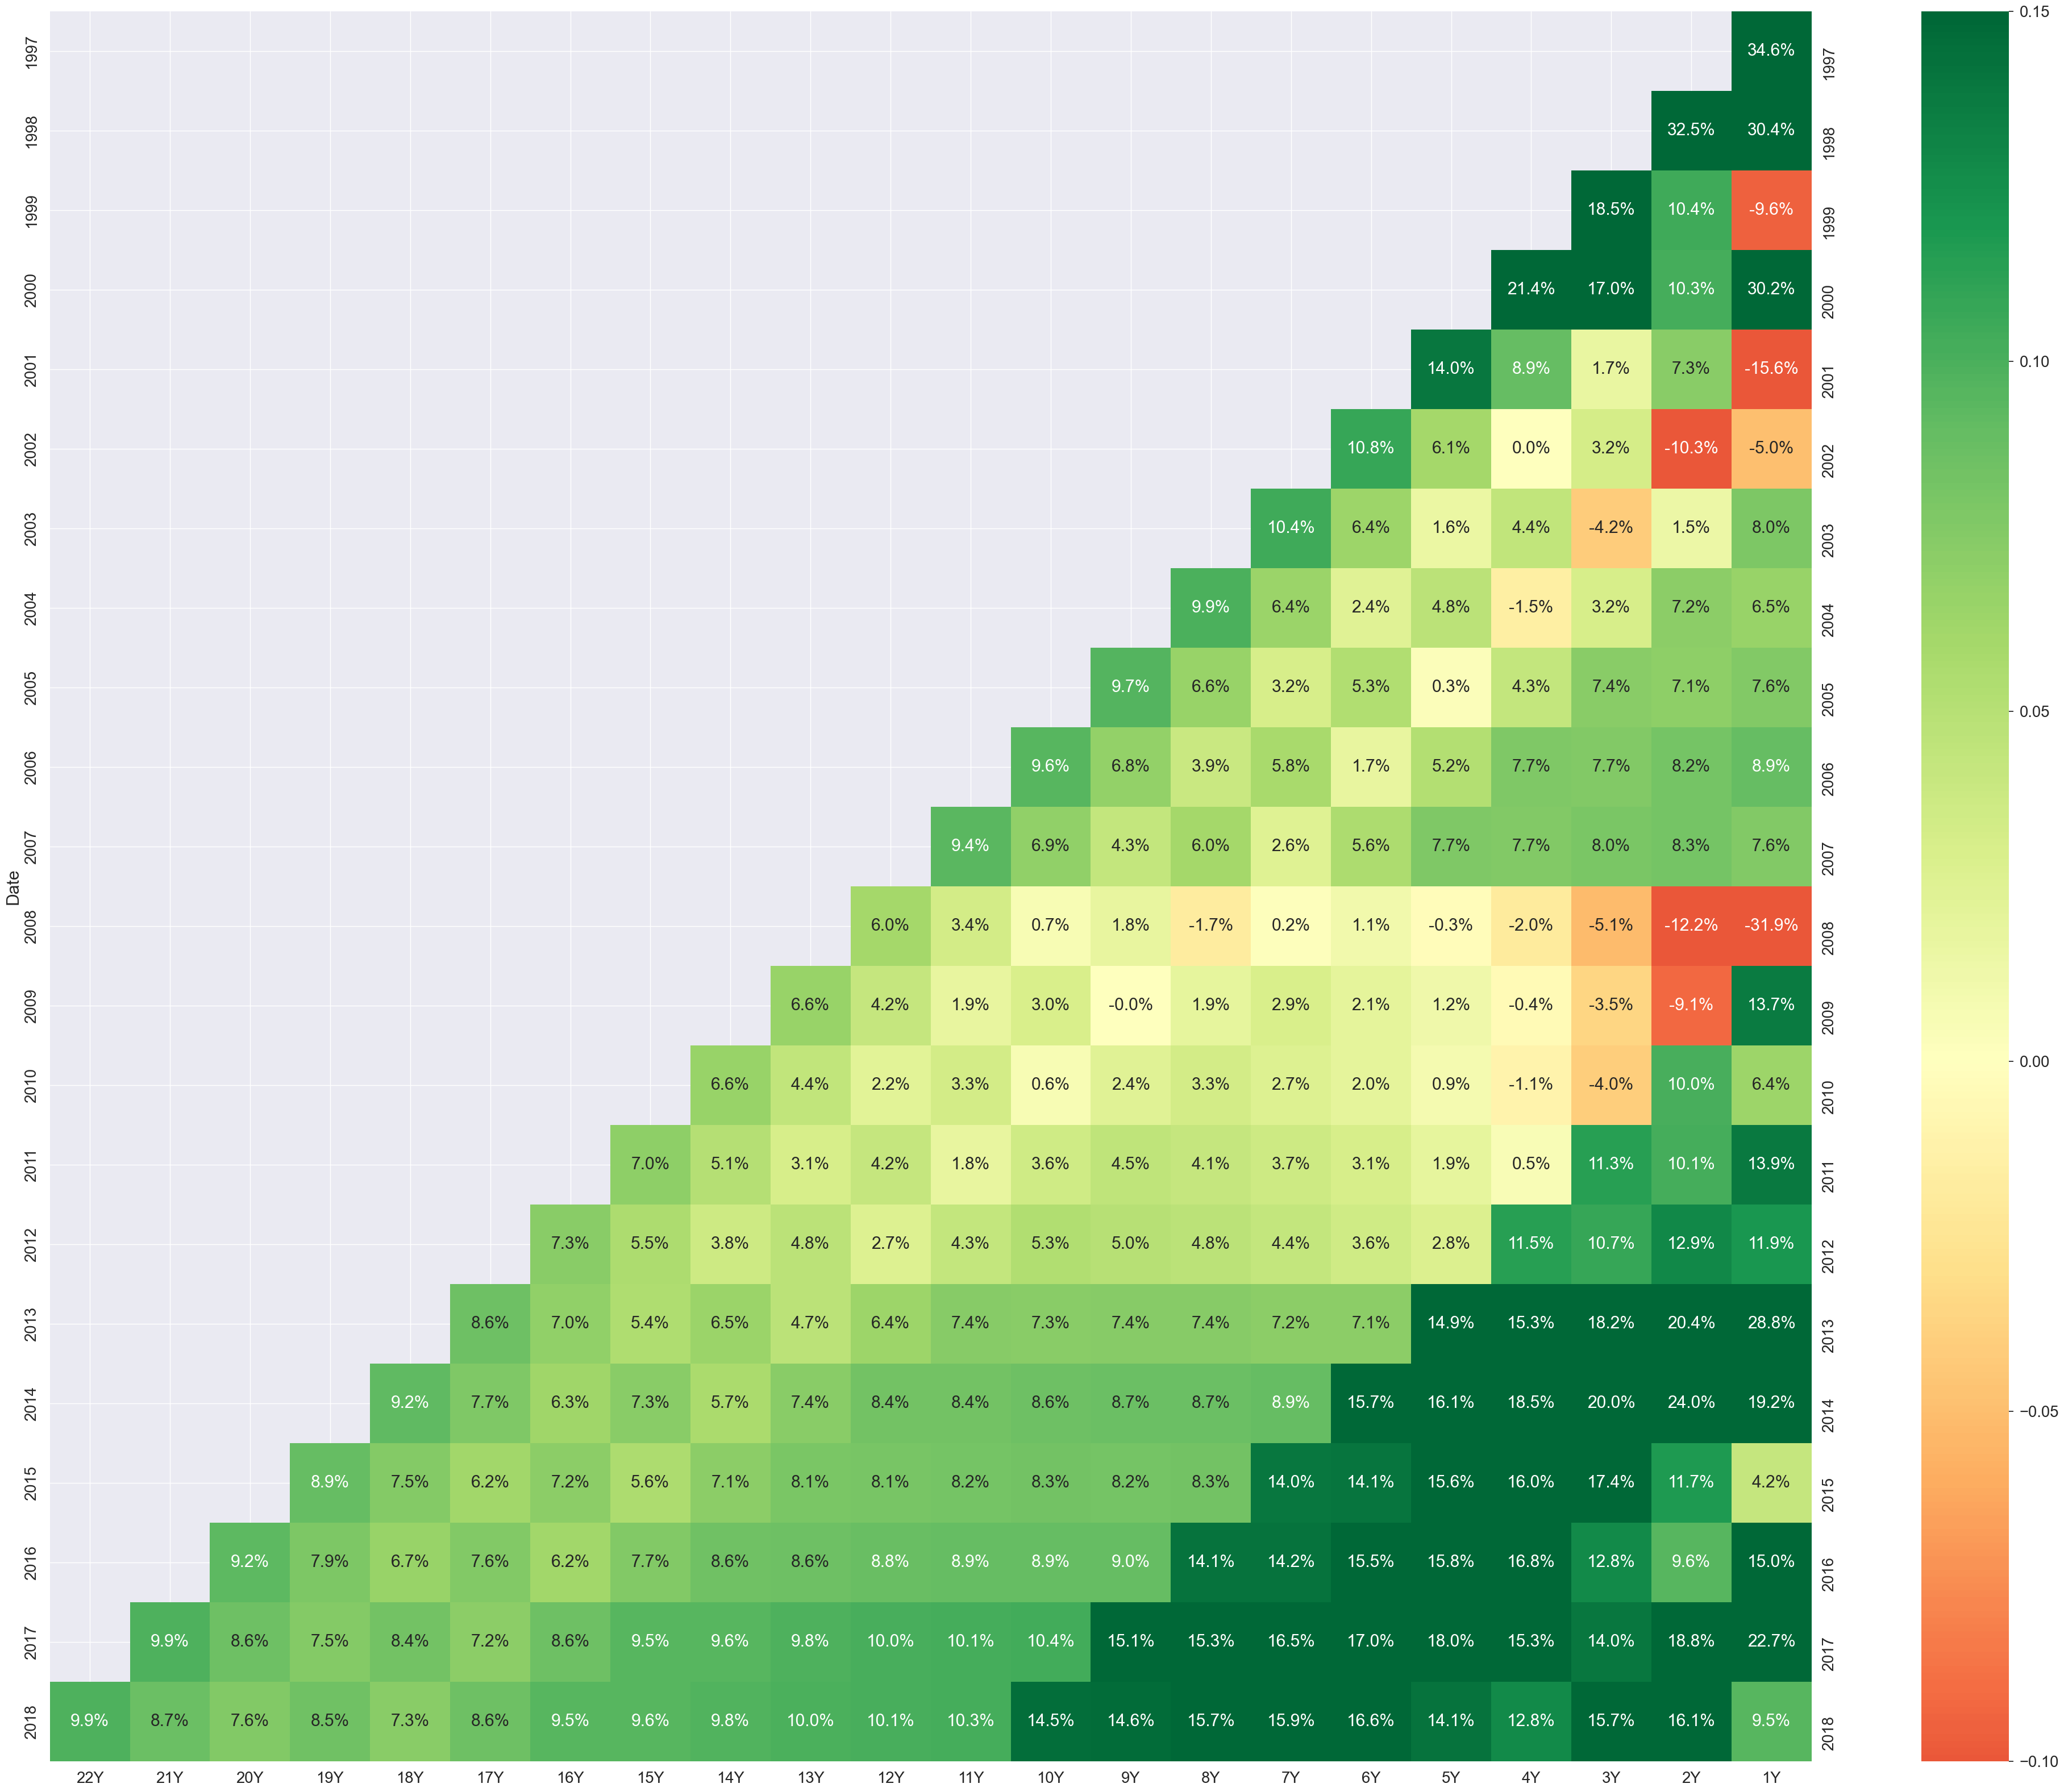

In [36]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot = True, fmt = ".1%", cmap = "RdYlGn", 
            vmin = -0.10, vmax = 0.15, center = 0)
plt.tick_params(axis = "y", labelright =True)
plt.show()

> __Mary is not right. Her Portfolio even lost value in the nine-year Period from 2001 until 2009!__

---

# Step 4:
### Analyze and compare the performance of her Large-Cap Health Care Portfolio with other sectors for the most recent 4-years period from 2015 until 2018. Provide Mary with an interactive normalized Price Chart where she can play around!

Hint: Import and use the csv-file "sector_indexes.csv". Use an interactive Plotly Chart!

In [37]:
# So far we have the health index:
hea_index

Date
1996-12-31   100.000
1997-01-03   101.705
1997-01-06   101.898
1997-01-07   102.263
1997-01-08   101.824
               ...  
2018-12-21   857.504
2018-12-24   835.072
2018-12-26   867.160
2018-12-27   874.382
2018-12-28   876.393
Name: Health Care, Length: 5535, dtype: float64

__Import a few sector indexes__
> Let's import a few other __stock indexes__ (e.g sector index of tech, and so on) for compare the sectors __to my health index__.

In [41]:
indexes = pd.read_csv("../Data/sector_indexes.csv", parse_dates = ["Date"], index_col = "Date")

In [42]:
indexes.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation
Date,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214


In [43]:
indexes["Health_Care"] = hea_index

In [44]:
indexes.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,524.177
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359,523.931
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619,521.734
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660,523.160
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214,530.601


In [45]:
# All the other sectors already normalized, so let's normalize also our health index!
indexes.Health_Care = indexes.Health_Care.div(indexes.Health_Care.iloc[0]).mul(100)

In [46]:
# Now, all the sector index start from base of 100
indexes.head()
# its mean that we can compare them!

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359,99.953
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619,99.534
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660,99.806
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214,101.226


In [47]:
indexes.info()
# we have 11 sectors!

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2014-12-31 to 2018-12-28
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Basic Industries       1006 non-null   float64
 1   Capital Goods          1006 non-null   float64
 2   Consumer Durables      1006 non-null   float64
 3   Consumer Non-Durables  1006 non-null   float64
 4   Consumer Services      1006 non-null   float64
 5   Energy                 1006 non-null   float64
 6   Finance                1006 non-null   float64
 7   Public Utilities       1006 non-null   float64
 8   Technology             1006 non-null   float64
 9   Transportation         1006 non-null   float64
 10  Health_Care            1006 non-null   float64
dtypes: float64(11)
memory usage: 94.3 KB


In [48]:
import cufflinks as cf

__Plot & Compare all the sector indexes__ 

In [49]:
indexes.iplot()

# We can see that the cunsumer sector as the large return over the years
# the tech sector also no so bad... 

---

# Step 5:
### Compare annualized risk and return based on daily (simple) returns and create an appropriate plot! Calculate the Sharpe Ratio and compare! 

(In terms of Sharpe Ratio, how did Mary´s Portfolio perform compared to the other Indexes?)

Hint: Assume a risk-free Return of 1.3% p.a.

In [50]:
indexes.head()

# So far we have the sectoes indexes, normalized with base of 100:

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359,99.953
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619,99.534
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660,99.806
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214,101.226


In [51]:
# Let's compute the simple return:
ret = indexes.pct_change().dropna()

In [52]:
# compute the annualize mean return and annualize risk
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T # mean return and risk
    summary.columns = ["Return", "Risk"] 
    summary.Return = summary.Return*252         # annualize mean return
    summary.Risk = summary.Risk * np.sqrt(252)  # annualize risk  
    return summary

In [53]:
summary = ann_risk_return(ret)

In [54]:
summary
# So far we have the sectors indexes and their annualize mean and annualize risk

,Return,Risk
Basic Industries,0.077,0.163
Capital Goods,0.138,0.163
Consumer Durables,0.082,0.142
Consumer Non-Durables,0.045,0.140
Consumer Services,0.310,0.234
Energy,0.045,0.204
Finance,0.073,0.203
Public Utilities,0.092,0.127
Technology,0.190,0.225
Transportation,0.079,0.186


__Plot the annualize mean and return for each sector__

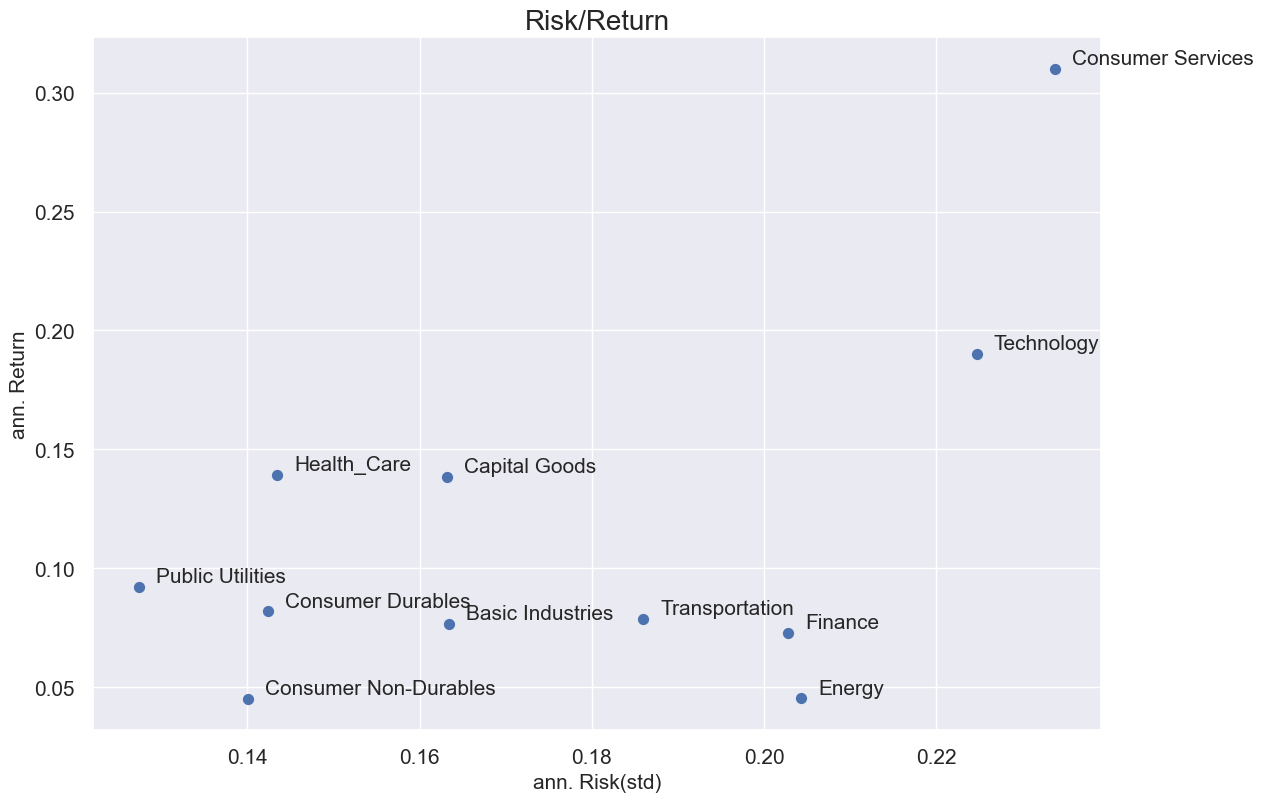

In [55]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [56]:
# risk free return:

rf = [0.013, 0] # mean return of 1.3%, and risk of 0 
rf

[0.013, 0]

In [57]:
# Compute the sharp ratio: the ratio between return and risk.
# the higer - the better
summary["Sharpe"] = (summary.Return - rf[0]) / summary.Risk

In [60]:
summary.sort_values("Sharpe", ascending = False)

,Return,Risk,Sharpe
Consumer Services,0.310,0.234,1.271
Health_Care,0.139,0.144,0.879
Technology,0.190,0.225,0.789
Capital Goods,0.138,0.163,0.768
Public Utilities,0.092,0.127,0.621
Consumer Durables,0.082,0.142,0.483
Basic Industries,0.077,0.163,0.390
Transportation,0.079,0.186,0.353
Finance,0.073,0.203,0.294
Consumer Non-Durables,0.045,0.140,0.229


The Large-Cap Health Sector showed the second highest Sharpe Ratio!

---

#  Step 6:
###  Show Mary that she could have improved the Sharpe Ratio of her Portfolio by adding other Sectors, without increasing the Total Risk of her Portfolio! Educate her on the Portfolio Diversification Effect!

> __Lets Simulate 50,000 random Portfolios and show the best Portfolio as well as a visual summary of your analysis.__ 

__Our goal is to find the optimal weigths of each sector index in our portfolio__

<strong style="color:green">Let's create an optimal portfolio index that contain 11 weigths: each weigth for sector!</strong>

In [63]:
ret.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2015-01-02,-0.006,0.006,-0.001,-0.010,-0.007,0.001,0.001,0.003,-0.002,-0.006,-0.000
2015-01-05,-0.020,-0.015,-0.011,-0.011,-0.017,-0.042,-0.029,-0.012,-0.020,-0.028,-0.004
2015-01-06,-0.002,-0.010,-0.008,0.006,-0.012,-0.004,-0.025,0.004,-0.021,-0.020,0.003
2015-01-07,0.009,0.018,0.009,0.016,0.016,0.006,0.006,0.012,-0.000,0.006,0.014
2015-01-08,0.014,0.016,0.018,0.017,0.013,0.022,0.017,0.010,0.009,0.023,0.027


In [64]:
# number of asssets
noa = len(ret.columns)
noa

# the number of asset going is 11, as the number of the sector indexes!

11

In [66]:
# number of portfolios
nop = 50000

In [68]:
# Create 50,000 random portfolios
np.random.seed(111)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [69]:
# Normalize their weigths
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [70]:
weights

array([[0.13785123, 0.03807189, 0.09819373, ..., 0.05374751, 0.07603494,
        0.22309308],
       [0.04681619, 0.01598951, 0.13186639, ..., 0.17739217, 0.15635744,
        0.16553591],
       [0.12969312, 0.15765315, 0.09183974, ..., 0.13001331, 0.11100301,
        0.08993248],
       ...,
       [0.11569744, 0.09323125, 0.08836689, ..., 0.09080952, 0.11341557,
        0.06591838],
       [0.20231586, 0.13734279, 0.09988422, ..., 0.06725256, 0.12817164,
        0.08679184],
       [0.13898176, 0.0131797 , 0.07500721, ..., 0.16656342, 0.01204152,
        0.09847087]])

In [74]:
# Senity check: the sum of each portfolio weigths sum to 1:
weights.sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [75]:
# Compute the 50,000 portfolios return, based on the weigths!

# the dot product of the return of the secotr indexes * the weigths of the random portfolios
port_ret = ret.dot(weights.T)

In [76]:
port_ret.head()

# See the 50,000 portfolio returns over the time:

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,-0.003,-0.003,-0.003,-0.001,-0.002,-0.002,-0.002,-0.001,-0.000,-0.002,...,-0.001,-0.001,-0.003,-0.003,-0.001,-0.002,-0.000,-0.002,-0.002,-0.003
2015-01-05,-0.014,-0.018,-0.017,-0.018,-0.020,-0.023,-0.019,-0.019,-0.022,-0.021,...,-0.020,-0.018,-0.016,-0.018,-0.018,-0.021,-0.018,-0.020,-0.018,-0.019
2015-01-06,-0.003,-0.008,-0.009,-0.008,-0.006,-0.010,-0.006,-0.011,-0.012,-0.010,...,-0.010,-0.006,-0.008,-0.006,-0.008,-0.008,-0.011,-0.011,-0.007,-0.006
2015-01-07,0.012,0.009,0.011,0.012,0.011,0.009,0.011,0.011,0.009,0.009,...,0.009,0.011,0.010,0.012,0.012,0.009,0.008,0.010,0.010,0.009
2015-01-08,0.018,0.018,0.017,0.018,0.015,0.020,0.017,0.019,0.017,0.016,...,0.016,0.018,0.017,0.016,0.019,0.016,0.015,0.017,0.017,0.016


In [77]:
# Commpute the annualize risk and return for all the 50,000 portfolios:
port_summary = ann_risk_return(port_ret)

In [78]:
port_summary

,Return,Risk
0,0.110,0.122
1,0.115,0.133
2,0.119,0.133
3,0.121,0.133
4,0.119,0.132
...,...,...
49995,0.114,0.134
49996,0.116,0.132
49997,0.126,0.139
49998,0.099,0.130


In [88]:
summary

,Return,Risk,Sharpe
Basic Industries,0.077,0.163,0.390
Capital Goods,0.138,0.163,0.768
Consumer Durables,0.082,0.142,0.483
Consumer Non-Durables,0.045,0.140,0.229
Consumer Services,0.310,0.234,1.271
Energy,0.045,0.204,0.158
Finance,0.073,0.203,0.294
Public Utilities,0.092,0.127,0.621
Technology,0.190,0.225,0.789
Transportation,0.079,0.186,0.353


__Plot the risk & return of the 50,000 portfolios, and also of the sectors indexes portfolios__

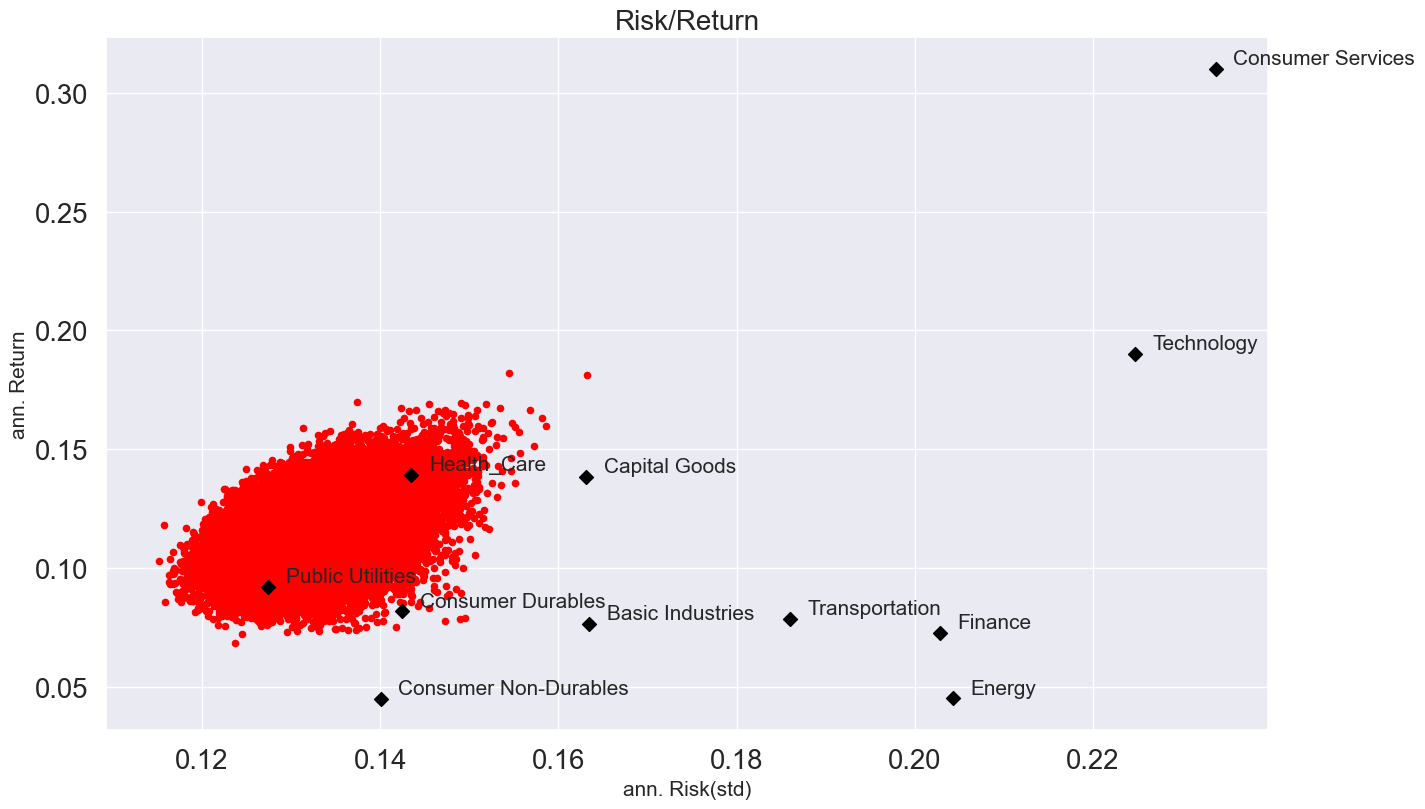

In [89]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "red")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "black", marker = "D")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

# the red dots: is the random portfolios weigths - based on the health care sector
# the black dots: the sectors indexes

In [80]:
# Compute the sharp ratio of the random portfolios
port_summary["Sharpe"] = (port_summary.Return - rf[0]) / port_summary.Risk

In [81]:
port_summary

,Return,Risk,Sharpe
0,0.110,0.122,0.798
1,0.115,0.133,0.769
2,0.119,0.133,0.794
3,0.121,0.133,0.811
4,0.119,0.132,0.800
...,...,...,...
49995,0.114,0.134,0.757
49996,0.116,0.132,0.777
49997,0.126,0.139,0.815
49998,0.099,0.130,0.663


In [82]:
port_summary.describe()

,Return,Risk,Sharpe
count,50000.000,50000.000,50000.000
mean,0.115,0.132,0.774
std,0.014,0.005,0.092
min,0.068,0.115,0.440
25%,0.106,0.129,0.710
50%,0.115,0.132,0.777
75%,0.125,0.136,0.840
max,0.182,0.163,1.142


In [83]:
# The index that contain the max sharp ratio of our random portfolios
msrp = port_summary.Sharpe.idxmax()
msrp

46957

In [84]:
# This is the annualize risk & return of the optimal weigths portfolio 
msrp_p = port_summary.iloc[msrp]
msrp_p

Return   0.170
Risk     0.137
Sharpe   1.142
Name: 46957, dtype: float64

In [90]:
summary

,Return,Risk,Sharpe
Basic Industries,0.077,0.163,0.390
Capital Goods,0.138,0.163,0.768
Consumer Durables,0.082,0.142,0.483
Consumer Non-Durables,0.045,0.140,0.229
Consumer Services,0.310,0.234,1.271
Energy,0.045,0.204,0.158
Finance,0.073,0.203,0.294
Public Utilities,0.092,0.127,0.621
Technology,0.190,0.225,0.789
Transportation,0.079,0.186,0.353


In [86]:
# Maximum sharp ratio portfolio weigths: 
msrp_w = weights[msrp, :]
msrp_w

# This is the optimal weigths for our portfolio! 
# each weigth -> correspond to sector index!

array([0.13014365, 0.04369762, 0.09228104, 0.00534677, 0.28593317,
       0.00373666, 0.0099978 , 0.10496562, 0.05529165, 0.01815424,
       0.25045178])

In [91]:
msrp_w.sum()

1.0000000000000002

__This is the optimal weigths and the corresponding sector index for our portfolio__
> Each weigth -> corresponsed to sector index!

So, combination of sectors is give us a good diversification effect!

In [87]:
pd.Series(index = indexes.columns, data = msrp_w)

Basic Industries        0.130
Capital Goods           0.044
Consumer Durables       0.092
Consumer Non-Durables   0.005
Consumer Services       0.286
Energy                  0.004
Finance                 0.010
Public Utilities        0.105
Technology              0.055
Transportation          0.018
Health_Care             0.250
dtype: float64

Congrats! You could manage to convince Mary to diversify her Stock Portfolio!

---

# Step 7:
### __Identify Sectors__ with positive __Alpha__ and a __Beta-Factor < 1__. Which Sectors will be added to Mary´s Portfolio?

Use the S&P 500 Total Return Index as Market Portfolio (SP500_TR.csv). Calculate the following Metrics for the Sector Indexes and the Market Portfolio:
- Annualized Risk and Return (daily simple Returns)
- Sharpe Ratio
- Annualized Total Risk in Variance units
- Systematic Risk
- Unsystematic Risk
- Beta
- CAPM Return
- Alpha

In [92]:
ret.head()
# The simple return in precents of the sector indexes: 

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2015-01-02,-0.006,0.006,-0.001,-0.010,-0.007,0.001,0.001,0.003,-0.002,-0.006,-0.000
2015-01-05,-0.020,-0.015,-0.011,-0.011,-0.017,-0.042,-0.029,-0.012,-0.020,-0.028,-0.004
2015-01-06,-0.002,-0.010,-0.008,0.006,-0.012,-0.004,-0.025,0.004,-0.021,-0.020,0.003
2015-01-07,0.009,0.018,0.009,0.016,0.016,0.006,0.006,0.012,-0.000,0.006,0.014
2015-01-08,0.014,0.016,0.018,0.017,0.013,0.022,0.017,0.010,0.009,0.023,0.027


In [93]:
# the noamalize close price (base 100) of our sectors:
indexes.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359,99.953
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619,99.534
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660,99.806
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214,101.226


In [115]:
# the SP500
SP500 = pd.read_csv("../Data/SP500_TR.csv", parse_dates = ["Date"], index_col = "Date")["Close"]

In [116]:
# takes the dates range like our sectors index.
SP500 = SP500.reindex(indexes.index)

In [117]:
# Compute the simple return of the SP500:
ret_SP = SP500.pct_change().dropna()

In [118]:
ret_SP.head()

Date
2015-01-02   -0.000
2015-01-05   -0.018
2015-01-06   -0.009
2015-01-07    0.012
2015-01-08    0.018
Name: Close, dtype: float64

In [119]:
# Add the return of SP500 to the DataFrame that contain the return of the sectors index:
ret["SP500"] = ret_SP

In [120]:
ret

# So far we have the return of each sector, include the return of SP500

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care,SP500
Date,,,,,,,,,,,,
2015-01-02,-0.006,0.006,-0.001,-0.010,-0.007,0.001,0.001,0.003,-0.002,-0.006,-0.000,-0.000
2015-01-05,-0.020,-0.015,-0.011,-0.011,-0.017,-0.042,-0.029,-0.012,-0.020,-0.028,-0.004,-0.018
2015-01-06,-0.002,-0.010,-0.008,0.006,-0.012,-0.004,-0.025,0.004,-0.021,-0.020,0.003,-0.009
2015-01-07,0.009,0.018,0.009,0.016,0.016,0.006,0.006,0.012,-0.000,0.006,0.014,0.012
2015-01-08,0.014,0.016,0.018,0.017,0.013,0.022,0.017,0.010,0.009,0.023,0.027,0.018
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.003,-0.024,0.003,-0.019,-0.049,-0.004,-0.025,-0.006,-0.033,-0.013,-0.010,-0.021
2018-12-24,-0.026,-0.033,-0.054,-0.018,-0.024,-0.030,-0.021,-0.035,-0.008,-0.031,-0.026,-0.027
2018-12-26,0.032,0.047,0.037,0.020,0.086,0.050,0.041,0.018,0.066,0.056,0.038,0.050


In [121]:
# Based on the simple return, calculate the annualize risk and return:
summary = ann_risk_return(ret)

In [103]:
summary

,Return,Risk
Basic Industries,0.077,0.163
Capital Goods,0.138,0.163
Consumer Durables,0.082,0.142
Consumer Non-Durables,0.045,0.140
Consumer Services,0.310,0.234
Energy,0.045,0.204
Finance,0.073,0.203
Public Utilities,0.092,0.127
Technology,0.190,0.225
Transportation,0.079,0.186


In [104]:
# Compute the sharp ratio of each instrument: 
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]

# Compute the variance risk of each instrument: 
summary["TotalRisk_var"] = np.power(summary.Risk, 2)

In [105]:
# Compute the annualize covariance each the instruments:
COV = ret.cov()*252

In [106]:
COV

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care,SP500
Basic Industries,0.027,0.017,0.014,0.014,0.016,0.024,0.019,0.010,0.016,0.017,0.013,0.016
Capital Goods,0.017,0.027,0.014,0.012,0.022,0.020,0.023,0.009,0.022,0.021,0.017,0.019
Consumer Durables,0.014,0.014,0.020,0.013,0.013,0.013,0.012,0.011,0.012,0.014,0.012,0.013
Consumer Non-Durables,0.014,0.012,0.013,0.020,0.012,0.012,0.010,0.011,0.012,0.011,0.011,0.012
Consumer Services,0.016,0.022,0.013,0.012,0.055,0.019,0.021,0.009,0.038,0.020,0.017,0.022
Energy,0.024,0.020,0.013,0.012,0.019,0.042,0.025,0.010,0.018,0.023,0.015,0.020
Finance,0.019,0.023,0.012,0.010,0.021,0.025,0.041,0.006,0.021,0.024,0.017,0.022
Public Utilities,0.010,0.009,0.011,0.011,0.009,0.010,0.006,0.016,0.008,0.008,0.009,0.009
Technology,0.016,0.022,0.012,0.012,0.038,0.018,0.021,0.008,0.050,0.018,0.017,0.022
Transportation,0.017,0.021,0.014,0.011,0.020,0.023,0.024,0.008,0.018,0.035,0.015,0.019


In [107]:
# Extract the systematic risk:
# its the covariance between the assets and the Market index! 
summary["SystRisk_var"] = COV.iloc[:, -1]

In [108]:
# Un systenatic risk: is the different between the total risk and the sustematic risk:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])

# this is the risk that we can reduce (by the diversification effect)

__Interpret `summary`__
> So far we have the return,risk, ... , the systematic & unsustenatic risk of each instrument, relative the to market index.

- We determine that the __index market portfolio__ is the SP500. 

In [109]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
Basic Industries,0.077,0.163,0.390,0.027,0.016,0.011
Capital Goods,0.138,0.163,0.768,0.027,0.019,0.007
Consumer Durables,0.082,0.142,0.483,0.020,0.013,0.007
Consumer Non-Durables,0.045,0.140,0.229,0.020,0.012,0.008
Consumer Services,0.310,0.234,1.271,0.055,0.022,0.032
Energy,0.045,0.204,0.158,0.042,0.020,0.022
Finance,0.073,0.203,0.294,0.041,0.022,0.019
Public Utilities,0.092,0.127,0.621,0.016,0.009,0.007
Technology,0.190,0.225,0.789,0.050,0.022,0.029
Transportation,0.079,0.186,0.353,0.035,0.019,0.016


In [110]:
# Now, let's compute the beta:
summary["beta"] = summary.SystRisk_var / summary.loc["SP500", "SystRisk_var"]

In [111]:
# Compute the CAPM return
summary["capm_ret"] = rf[0] + (summary.loc["SP500", "Return"] - rf[0]) * summary.beta

In [112]:
# Compute the alpha:
summary["alpha"] = summary.Return - summary.capm_ret

In [113]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
Basic Industries,0.077,0.163,0.390,0.027,0.016,0.011,0.848,0.067,0.009
Capital Goods,0.138,0.163,0.768,0.027,0.019,0.007,1.042,0.080,0.058
Consumer Durables,0.082,0.142,0.483,0.020,0.013,0.007,0.694,0.058,0.024
Consumer Non-Durables,0.045,0.140,0.229,0.020,0.012,0.008,0.623,0.053,-0.008
Consumer Services,0.310,0.234,1.271,0.055,0.022,0.032,1.205,0.090,0.220
Energy,0.045,0.204,0.158,0.042,0.020,0.022,1.052,0.081,-0.035
Finance,0.073,0.203,0.294,0.041,0.022,0.019,1.164,0.088,-0.015
Public Utilities,0.092,0.127,0.621,0.016,0.009,0.007,0.470,0.043,0.049
Technology,0.190,0.225,0.789,0.050,0.022,0.029,1.177,0.089,0.102
Transportation,0.079,0.186,0.353,0.035,0.019,0.016,1.020,0.079,0.000


__Find the best sectors:__
- Why we want to find the sectors/asssets that have __alpha > 0 and beta < 1__ ? 
    - __`aplha > 0`__ = the return of the instrument bigger that the expected return based on capital market line. its a good sign, and its mean that the instrument outperform its CAPM return! the begger alphe - the better.
    -  __`beta < 1`__ = beta smaller than 1 means that the instrument is less risky from the market index portfolio! (beta < 1: the systematic risk of an instrument smaller than the systematic risk of the market portfolio index.)

In [114]:
summary.loc[(summary.alpha > 0) & (summary.beta < 1)]

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
Basic Industries,0.077,0.163,0.390,0.027,0.016,0.011,0.848,0.067,0.009
Consumer Durables,0.082,0.142,0.483,0.020,0.013,0.007,0.694,0.058,0.024
Public Utilities,0.092,0.127,0.621,0.016,0.009,0.007,0.470,0.043,0.049
Health_Care,0.139,0.144,0.879,0.021,0.016,0.005,0.835,0.067,0.073


You will add the Sectors Basic Industries, Consumer Durables and Public Utilities to Mary´s Health Care Portfolio.